# Author:- Suwarna Sunil Baraskar

# Task 2:- Predict the percentage of an student based on the no. of study hours.

# GRIP@ The Sparks Foundation (Data Science & Business Analytics Internship)

Prediction using Supervised Machine Learning.This is a simple linear regression problem.

Liabrires Used:- Numpy,Pandas,Scikit-learn,Matplotlib,Seaborn,pydot.
    
    
### What will be predicted score if a student studies for 9.25 hrs/ day?

#### Data can be found at http://bit.ly/w-data

In [40]:
#import operating system
import os
os.getcwd()

'C:\\Users\\HP'

In [41]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [42]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Loadind the dataset
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [45]:
print(dataset.shape)

(25, 2)


In [46]:
# checking missing values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [47]:
dataset.value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

In [48]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.



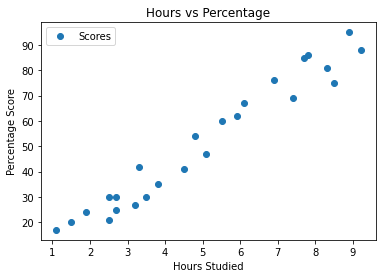

In [49]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

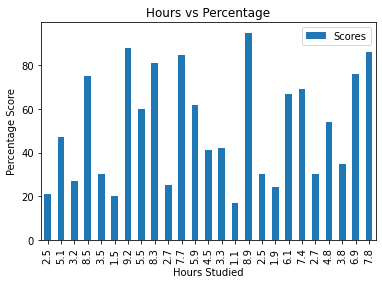

In [50]:
dataset.plot.bar(x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:xlabel='Hours'>

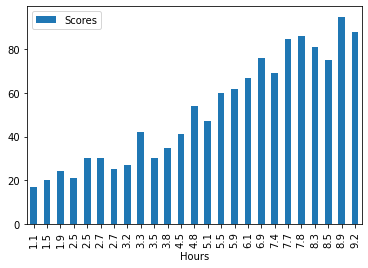

In [51]:
dataset.sort_values(['Hours'],axis=0,ascending=[True],inplace=True)
dataset.head()
dataset.plot.bar(x='Hours', y='Scores') 

# After plotting a graph we have observed that study hour increases , so score also increases. 

# split the data into x and y

In [52]:
# x - independent variable
# y - dependent variable
#x = dataset.iloc[:,0] # it's in table format
x = dataset.iloc[:,:-1].values # it's in array format
x

array([[1.1],
       [1.5],
       [1.9],
       [2.5],
       [2.5],
       [2.7],
       [2.7],
       [3.2],
       [3.3],
       [3.5],
       [3.8],
       [4.5],
       [4.8],
       [5.1],
       [5.5],
       [5.9],
       [6.1],
       [6.9],
       [7.4],
       [7.7],
       [7.8],
       [8.3],
       [8.5],
       [8.9],
       [9.2]])

In [53]:
y = dataset.iloc[:,1].values
y

array([17, 20, 24, 21, 30, 30, 25, 27, 42, 30, 35, 41, 54, 47, 60, 62, 67,
       76, 69, 85, 86, 81, 75, 95, 88], dtype=int64)

In [54]:
# split the data into training and test by 75:25 ratio
# sklearn - is for ML library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, random_state =0)
# training - building a model
# test - predicting dv and validation

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


# Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(x_test)
y_pred

array([28.37329676, 20.49244971, 77.62859081, 61.86689671, 46.10520262,
       85.50943786, 69.74774376])

In [58]:
y_test

array([30, 24, 85, 67, 41, 75, 76], dtype=int64)

In [59]:
regressor.coef_

array([9.85105881])

In [60]:
regressor.intercept_

1.7754379755795213

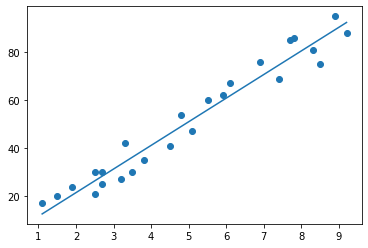

In [61]:
####Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Accuracy-r2-score

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test, y_pred)

0.9255426247821036

# Making predictions

In [64]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]
 [8.5]
 [6.9]]


In [71]:
# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,30,28.373297
1,24,20.492450
2,85,77.628591
3,67,61.866897
4,41,46.105203
5,75,85.509438
6,76,69.747744


In [76]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.89773196484398


In [79]:
hours = [[9.25]]
pred_score = regressor.predict(hours)
print("The predicted score is:",pred_score)

The predicted score is: [92.89773196]


# Evaluating the model


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.
For simplicity here, we have chosen the mean square error. 

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.64366610208055


# Accuracy is 92.5% and Mean Absolute error is 5.643 


### The absolute error is the absolute value of the difference between the forecasted value and the actual value.Mean Absolute error is 5.643 which is <10% is excellent for our model.
    
    
    
    
    

# THANKYOU